#### Objetivo: Exemplificar implicações na série variando os parâmetros GARCH

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [5]:
def simulaGARCH_p1q1(n, omega, alpha, beta = 0, return_series = 'variance'):
    
    np.random.seed(42)
    #Gera ruído branco e determina o tamanho do residuo e variancia
    white_noise = np.random.normal(size = n)
    residuals = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)

    for t in range(1, n):
        #Formula GARCH
        variance[t] = omega + (alpha * residuals[t-1]**2) + (beta * variance[t-1])
        #Residuo
        residuals[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    if return_series == 'variance':
        series_return = variance 
    else:
        series_return = residuals
        
    return series_return


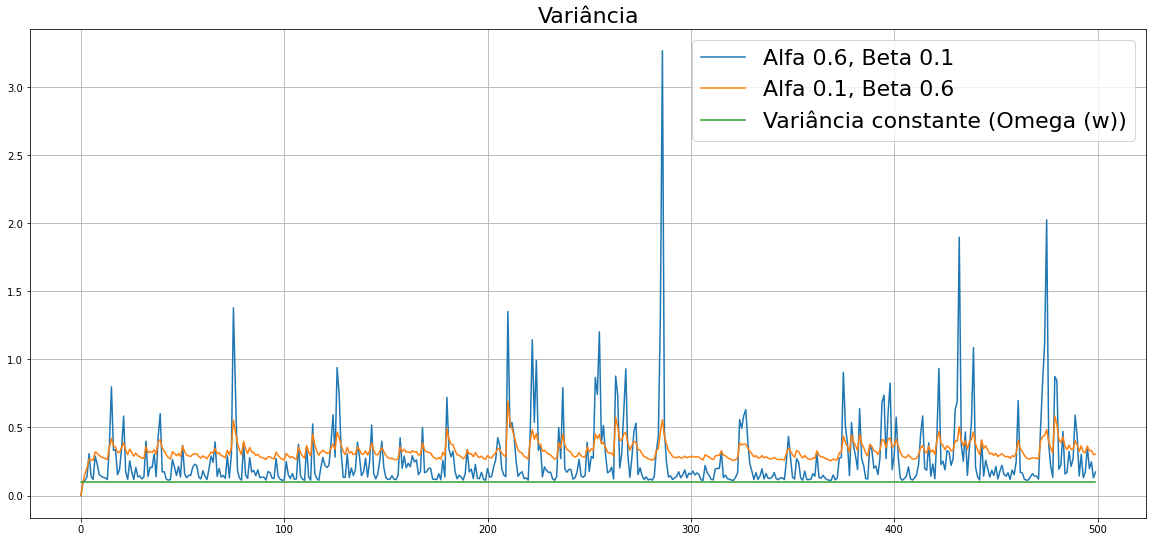

In [6]:
#Diferença do Alfa e Beta para a variância
fig, ax = plt.subplots(figsize = (20,9))

plt.plot(simulaGARCH_p1q1(500, 0.1, 0.6, 0.1),
         label = "Alfa 0.6, Beta 0.1")
plt.plot(simulaGARCH_p1q1(500, 0.1, 0.1, 0.6),
         label = "Alfa 0.1, Beta 0.6")
plt.plot(np.zeros((500, 1))+0.1, label = 'Variância constante (Omega (w))')
#plt.ylim(-1, 10)
plt.legend(fontsize = 22)
plt.grid(True)
plt.title('Variância', fontsize = 22)
plt.show()

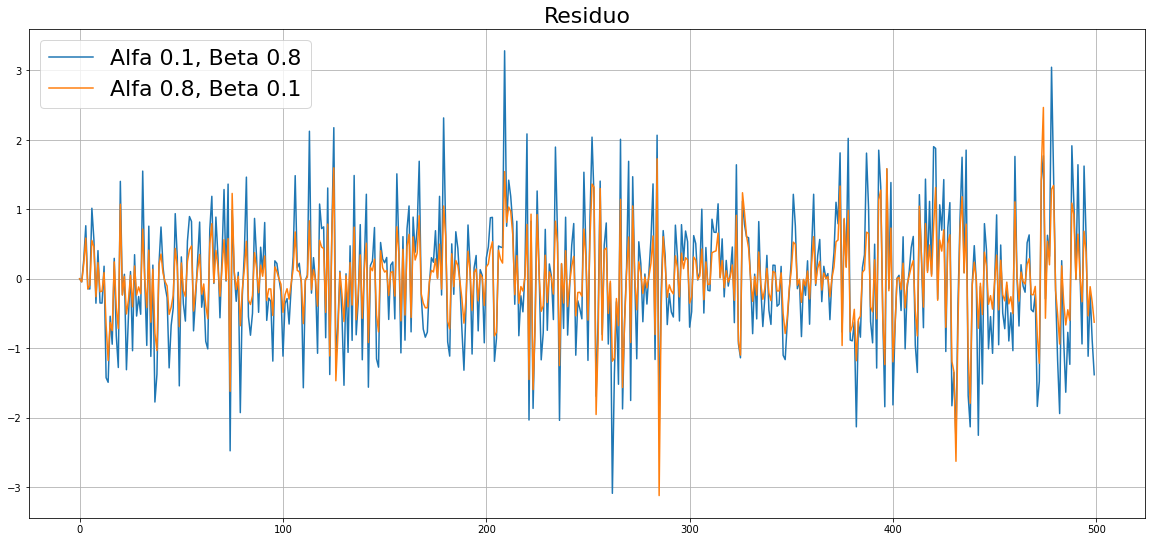

In [7]:
#Diferença do Alfa e Beta para o resíduo
fig, ax = plt.subplots(figsize = (20,9))

plt.plot(simulaGARCH_p1q1(500, 0.1, 0.1, 0.8,
                          return_series = 'residual'),
         label = "Alfa 0.1, Beta 0.8")
plt.plot(simulaGARCH_p1q1(500, 0.1, 0.8, 0.1,
                          return_series = 'residual'),
         label = "Alfa 0.8, Beta 0.1")

plt.title('Residuo', fontsize = 22)
plt.legend(fontsize = 22)
plt.grid(True)
plt.show()

In [8]:
def graficoGARCH(n, w, a, b):
    if (a + b) >= 1:
        main_title = 'Variância - Série não retorna para média (A+B >= 1)'
        color_title = 'red'
    else:
        main_title = "Variância - Série retorna para média (A+B < 1)"
        color_title = 'black'
    
    
    fix, ax = plt.subplots(figsize = (20,9))
    plt.plot(simulaGARCH_p1q1(n, w, a, b), color = 'green')
    plt.ylim(-1, 10)
    plt.grid(True)
    plt.title(main_title,fontsize = 22, color = color_title)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)

    plt.show()

In [9]:
@interact
def simulate_alpha_beta(Alfa=(0, 0.99, 0.03),
                      Beta = (0, 0.99, 0.03)):
    return graficoGARCH(500, 0.1, Alfa, Beta)


interactive(children=(FloatSlider(value=0.48, description='Alfa', max=0.99, step=0.03), FloatSlider(value=0.48…